#Introduction
Multiclass classification in deep learning is a supervised learning task that categorizes input data into one of three or more distinct, mutually exclusive classes.

It involves the following steps:
1. Become 1 with the data
2. Preprocess the data
3. Create a baseline model
4. Fit the model(Overfit) the model
5. Evaluate the model
6. Adjust different hyperparameters to try beat the baseline model
7. Repeat until satisfied


#1.Import and become 1 with the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the file
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2026-02-04 06:38:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  32.8MB/s    in 6.4s    

2026-02-04 06:38:34 (77.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

#walk through 10 classes of our image data
for dirpath,dirnames,filenames in  os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories  with {len(filenames)} images in {dirpath}")

There are 2 directories  with 0 images in 10_food_classes_all_data
There are 10 directories  with 0 images in 10_food_classes_all_data/train
There are 0 directories  with 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories  with 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories  with 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories  with 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories  with 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories  with 750 images in 10_food_classes_all_data/train/hamburger
There are 0 directories  with 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories  with 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories  with 750 images in 10_food_classes_all_data/train/steak
There are 0 directories  with 750 images in 10_food_classes_all_data/train/ice_cream
There are 1

In [3]:
#Set up a train and test directory
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [4]:
#Lets get the class names
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print (class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


['3104984.jpg']
Image shape: (512, 512, 3)


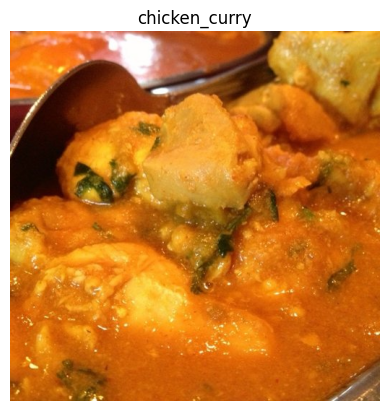

In [6]:
#Visualize the data
import random
img=view_random_image(train_dir,
                      target_class=random.choice(class_names))

#2.Prepare the data (Preprocess the data)


In [7]:
#Import datagenerator and preprocess
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

#Load data from directories and turn em into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#3.Create the model

In [8]:
#Create a baseline model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.optimizers import Adam

#1.Create our baseline model
model_1=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')


])

#2.Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#4.Fit the model

In [9]:
#3.Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.1491 - loss: 2.2505 - val_accuracy: 0.2572 - val_loss: 2.0491
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.2890 - loss: 1.9897 - val_accuracy: 0.2952 - val_loss: 1.9560
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.3950 - loss: 1.7443 - val_accuracy: 0.2864 - val_loss: 2.0513
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.5040 - loss: 1.4525 - val_accuracy: 0.3280 - val_loss: 2.0297
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.6046 - loss: 1.1638 - val_accuracy: 0.3192 - val_loss: 2.3192


#5.Evaluate the model

In [10]:
#Evaluating our model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        57,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,322 (731.73 KB)

 Trainable params: 62,440 (243.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 124,882 (487.82 KB)

In [11]:
#Evaluate our model on test data
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.3191 - loss: 2.2861


[2.3191723823547363, 0.3192000091075897]

<Axes: >

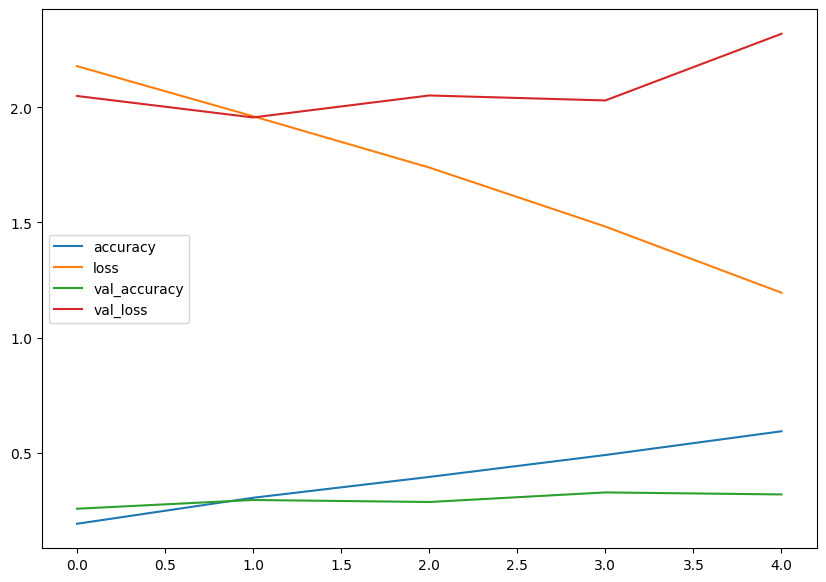

In [12]:
import pandas as pd

idk=pd.DataFrame(history_1.history).plot(figsize=(10,7))
idk

In [13]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


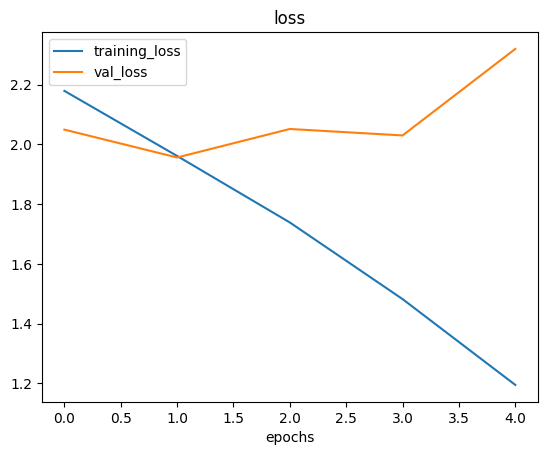

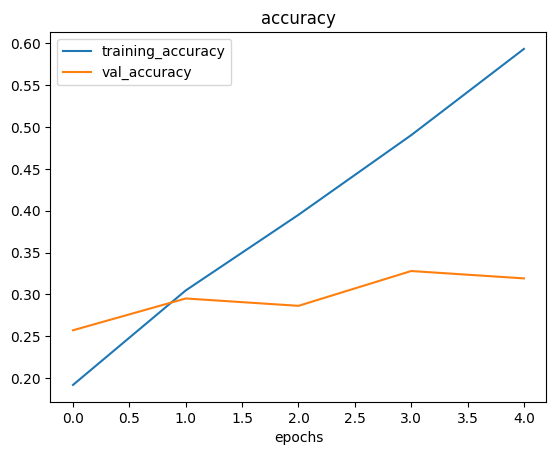

In [14]:
plot_loss_curves(history_1)

It looks like our model is overfitting quite badly

#6.Adjust the hperparameters to try to reduce overfitting

Our model is learning sth ,but its not generalizing well on test data

This can be solved by:
1. Data augmentation
2. *Simplify the model*-For this ,reduce the number of layers
3. Transfer learning
4. Get more data


In [15]:
#Try and simplify the model first

#Create the model
model_2=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

#compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Fit the modelm
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.1764 - loss: 2.4506 - val_accuracy: 0.3068 - val_loss: 1.9526
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.3613 - loss: 1.8506 - val_accuracy: 0.2876 - val_loss: 2.0344
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.4397 - loss: 1.6549 - val_accuracy: 0.3428 - val_loss: 1.9281
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.6188 - loss: 1.2427 - val_accuracy: 0.3184 - val_loss: 2.0733
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.7833 - loss: 0.7631 - val_accuracy: 0.3236 - val_loss: 2.1973


In [ ]:
plot_loss_curves(history_2)

Well ...worse than the previous ...
we can try other tricks
* Data augmentation
*



In [ ]:
#Data Augmentation
train_datagen=ImageDataGenerator(rescale=1./255,
                                        height_shift_range=0.2,
                                        width_shift_range=0.2,
                                        rotation_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,
                                       height_shift_range=0.2,
                                       width_shift_range=0.2,
                                       zoom_range=0.2,
                                       rotation_range=0.2)

train_data_augmented=train_datagen.flow_from_directory(directory=train_dir,
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       class_mode="categorical")

test_data_augmented=train_datagen.flow_from_directory(directory=test_dir,
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       class_mode="categorical",)



In [ ]:
#Create another model to use the augmented data on

model_3=tf.keras.models.clone_model(model_1)

#Compile the cloned  model
model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data_augmented,
                      validation_steps=len(test_data_augmented))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 549ms/step - accuracy: 0.1363 - loss: 2.2719 - val_accuracy: 0.1572 - val_loss: 2.2309
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 122s 519ms/step - accuracy: 0.1925 - loss: 2.1786 - val_accuracy: 0.2324 - val_loss: 2.1017
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 526ms/step - accuracy: 0.2422 - loss: 2.1099 - val_accuracy: 0.2812 - val_loss: 1.9865
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 122s 518ms/step - accuracy: 0.3071 - loss: 1.9766 - val_accuracy: 0.3332 - val_loss: 1.9157
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.3283 - loss: 1.9267

In [ ]:
#Plot the loss_curves
plot_loss_curves(history_3)

This is much better...

In [ ]:
#Use our cnn tomake preds on custom images
#Import the image data
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

Test our model on custom image

In [23]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [24]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


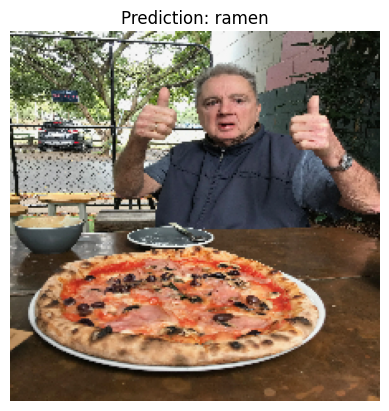

In [25]:
#Making preds using model 10
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


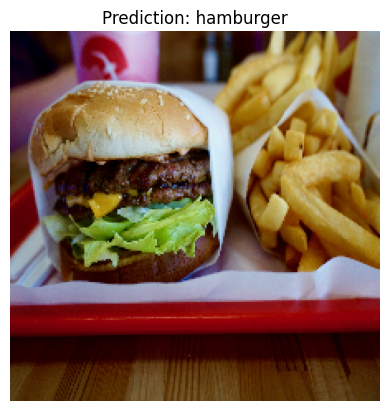

In [27]:
pred_and_plot(model=model_3,
              filename='03-hamburger.jpeg',
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


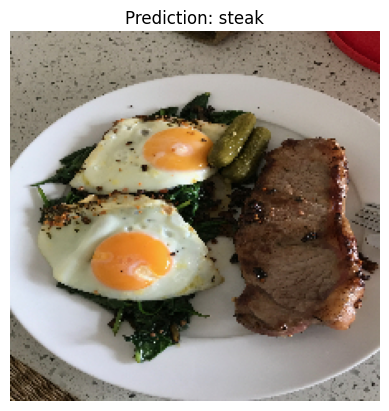

In [28]:
pred_and_plot(model=model_3,
              filename='03-steak.jpeg',
              class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


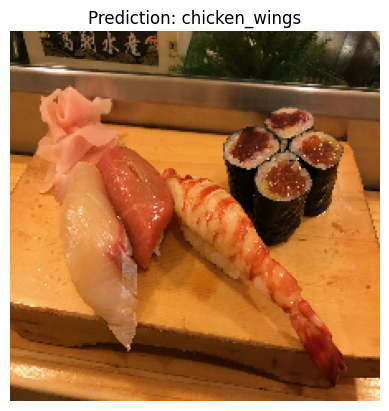

In [29]:
pred_and_plot(model=model_3,
              filename='03-sushi.jpeg',
              class_names=class_names)

#How to save our model

In [34]:
#Save a m0del
model_3.save('saved_trained_model_3.keras')

In [36]:
#Load in a trained model and evaluate it
loaded_model_3=tf.keras.models.load_model('saved_trained_model_3.keras')
loaded_model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.3882 - loss: 1.7848


[1.805859923362732, 0.37439998984336853]

In [37]:
#Compare with the original model_3
model_3.evaluate(test_data
                 )

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3768 - loss: 1.8132


[1.8058598041534424, 0.37439998984336853]